In [ ]:
# plot zero-shot results

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties
import numpy as np
import torch

In [2]:
seed=25
torch.manual_seed(seed)
np.random.seed(seed)

In [3]:
modelparams={"Mixup":0.70, "wav2vec2-large-960h":315, "whisper-tiny":39,"whisper-base":74,"whisper-small":244,"whisper-medium":769,"whisper-large-v3":1550}


In [4]:
df1=pd.DataFrame({"Model":list(modelparams.keys()), "Parameters(M)":list(modelparams.values())}) #, index=list(modelparams.keys()))

In [5]:
df1

,Model,Parameters(M)
0,Mixup,0.7
1,wav2vec2-large-960h,315.0
2,whisper-tiny,39.0
3,whisper-base,74.0
4,whisper-small,244.0
5,whisper-medium,769.0
6,whisper-large-v3,1550.0


In [6]:
df1['TrainingDataHrs']=[24,53000,680000,680000,680000,680000,680000]
df1

,Model,Parameters(M),TrainingDataHrs
0,Mixup,0.7,24
1,wav2vec2-large-960h,315.0,53000
2,whisper-tiny,39.0,680000
3,whisper-base,74.0,680000
4,whisper-small,244.0,680000
5,whisper-medium,769.0,680000
6,whisper-large-v3,1550.0,680000


In [7]:
df1.to_csv('datasets/model_params.csv', index=False)

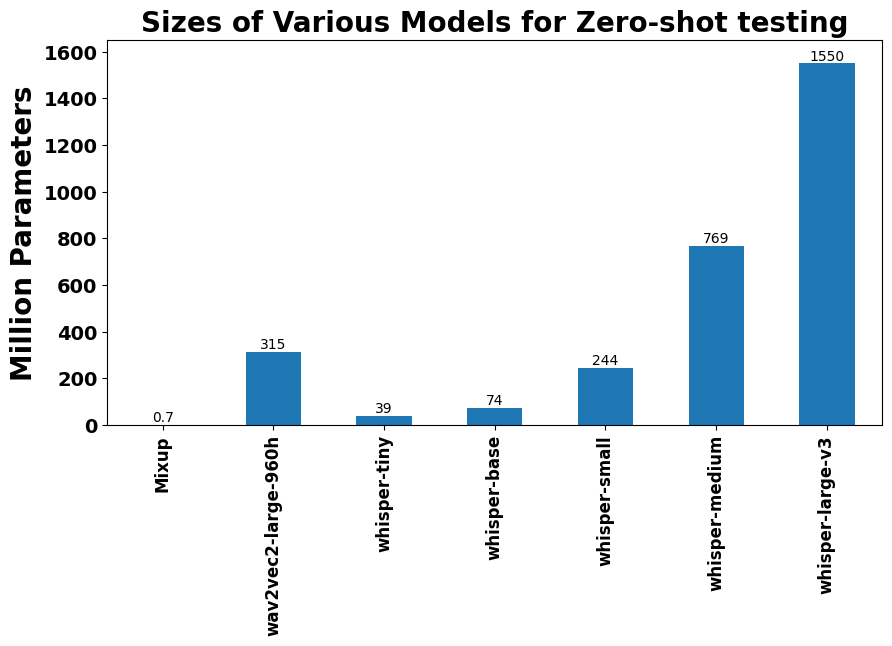

In [8]:
df=df1.drop(columns=['TrainingDataHrs'],axis=1)

title=f'Sizes of Various Models for Zero-shot testing'
fig, ax = plt.subplots(figsize=(10, 5))
df.plot.bar(rot=0, fontsize=15, legend=False,ax=ax)
ax.set_ylabel('Million Parameters',fontdict={'fontsize':20, 'weight':'bold'})
ax.set_ylim(0,1650,auto=True)
ax.set_xticklabels(list(df1['Model']))
plt.xticks(fontsize=12, weight='bold',rotation=90)
plt.yticks(fontsize=14, weight='bold')
ax.set_title(title,fontdict={'fontsize':20, 'weight':'bold'})
ax.bar_label(ax.containers[0])
savefile='plots_model_params.png'
plt.savefig(savefile, bbox_inches='tight')
plt.show()

In [9]:
list(df1['TrainingDataHrs']), len(df1)

([24, 53000, 680000, 680000, 680000, 680000, 680000], 7)

In [3]:
csvfn='datasets/model_params.csv'
df1=pd.read_csv(csvfn)
df1

,Model,Parameters(M),TrainingDataHrs
0,Mixup,0.7,24
1,wav2vec2-large-960h,315.0,53000
2,whisper-tiny,39.0,680000
3,whisper-base,74.0,680000
4,whisper-small,244.0,680000
5,whisper-medium,769.0,680000
6,whisper-large-v3,1550.0,680000


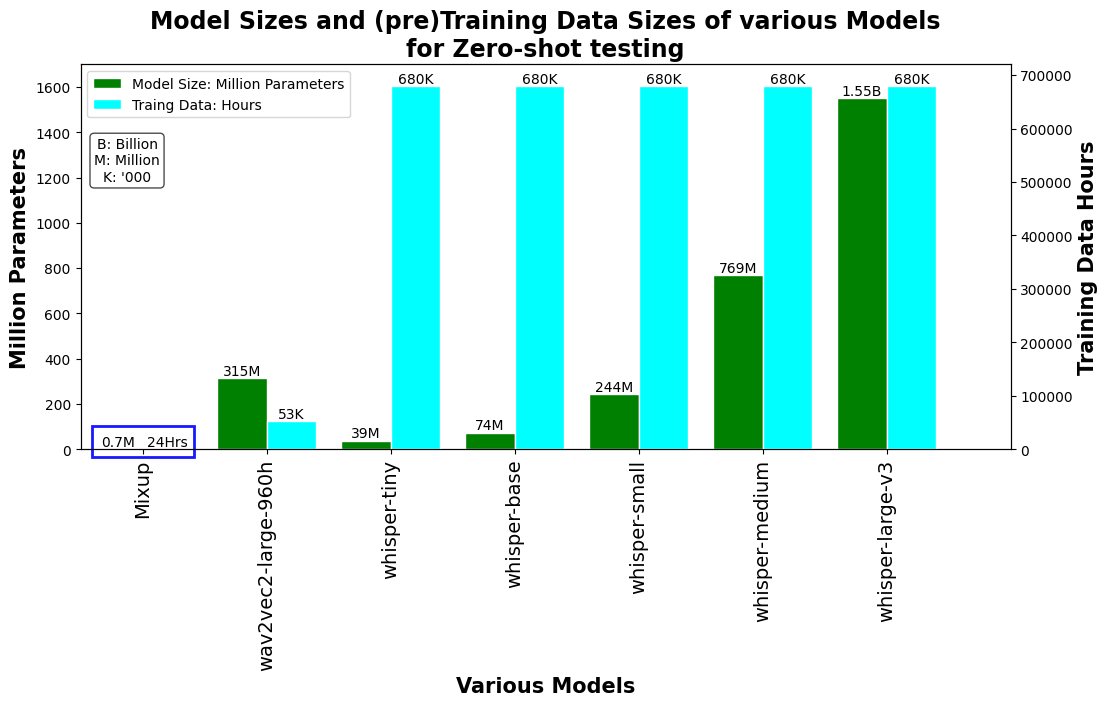

In [ ]:
# fig = plt.figure() # Create matplotlib figure
fig, ax = plt.subplots(figsize=(12, 5))

# ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

bar1=df1['Parameters(M)'].plot(kind='bar', color='green', ax=ax, width=width, edgecolor="w", position=1)
bar2=df1['TrainingDataHrs'].plot(kind='bar', color='cyan', ax=ax2, width=width, edgecolor="w", position=0)

ax.set_ylabel('Million Parameters',fontdict={'fontsize':15, 'weight':'bold'})
ax2.set_ylabel('Training Data Hours',fontdict={'fontsize':15, 'weight':'bold'})
ax.set_xlabel('Various Models',fontdict={'fontsize':15, 'weight':'bold'})

ax2.set_xticks(np.arange(len(df1)))
ax.set_xticklabels(list(df1['Model']),fontdict={'fontsize':15, 'weight':'bold'} )
plt.xticks(rotation=90)

title=f'Model Sizes and (pre)Training Data Sizes of various Models\nfor Zero-shot testing'
ax.set_title(title,fontdict={'fontsize':17, 'weight':'bold'})

labels1=[f'{d/1000:.2f}B' if d in [1550] else f'{int(d)}M' for d in list(df1['Parameters(M)'])]
labels1=[f'0.7M' if d in ['0M'] else d for d in labels1]
labels2=[f'{d//1000}K' if d not in [24] else f'{d}' for d in list(df1['TrainingDataHrs'])]
labels2=[f'{d}Hrs' if d in ['24'] else d for d in labels2]
ax.bar_label(ax.containers[0],labels=labels1)
ax2.bar_label(ax2.containers[0],labels=labels2)

ax.set_ylim(0,1700,auto=True)
ax2.set_ylim(0,720000,auto=True)
ax.set_xlim(-0.5,7,auto=True)

lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
ax.legend(lines_1 + lines_2, ['Model Size: Million Parameters']+['Traing Data: Hours'], loc='upper left')

box_properties = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.05, 0.75, f"B: Billion\nM: Million\nK: '000", transform=ax.transAxes,
            fontsize=10, verticalalignment='center', horizontalalignment='center',
            bbox=box_properties)

rect = patches.Rectangle((.012, -.020), 0.11, 0.08, transform=ax.transAxes,
            facecolor='white', edgecolor='blue', linewidth=2, alpha=0.9, clip_on=False)
ax.add_patch(rect)

savefile='plots_model_params1.png'
plt.savefig(savefile, bbox_inches='tight')

plt.show()

In [28]:
labels_1

['Parameters(M)']

In [79]:
csvfn='datasets/zero_shot_results.csv'
df2=pd.read_csv(csvfn)
df2

,Test-Datasets,Mixup,Whisper-Tiny,Whisper-Base,Whisper-Small,Whisper-medium,Whisper-large-v3,W2v2-large-960h
0,IndicTimit-HIN,4.91,11.63,10.39,7.64,6.69,6.45,5.06
1,IndicTimit-TAM,8.03,15.06,11.30,8.64,7.62,7.07,8.07
2,IndicTimit-BEN,2.69,8.92,8.36,6.51,6.04,5.92,2.96
3,IndicTimit-MLY,5.58,11.40,8.86,7.34,6.55,6.40,5.73
4,IndicTimit-MAR,4.79,10.75,8.63,7.09,6.21,6.03,5.10
5,IndicTimit-KAN,5.91,11.46,9.50,7.75,6.57,6.37,6.08
6,CV1-UKI,5.41,10.74,8.32,6.37,8.00,5.42,4.50
7,CV1-Oriental,11.13,20.56,11.49,7.73,6.54,6.11,10.40
8,CV1-NorthAM,3.57,8.10,6.57,5.64,5.24,5.37,2.98
9,CV1-African,6.69,12.30,9.19,7.50,6.98,6.53,6.29


In [80]:
len(list(df2['Test-Datasets']))

15

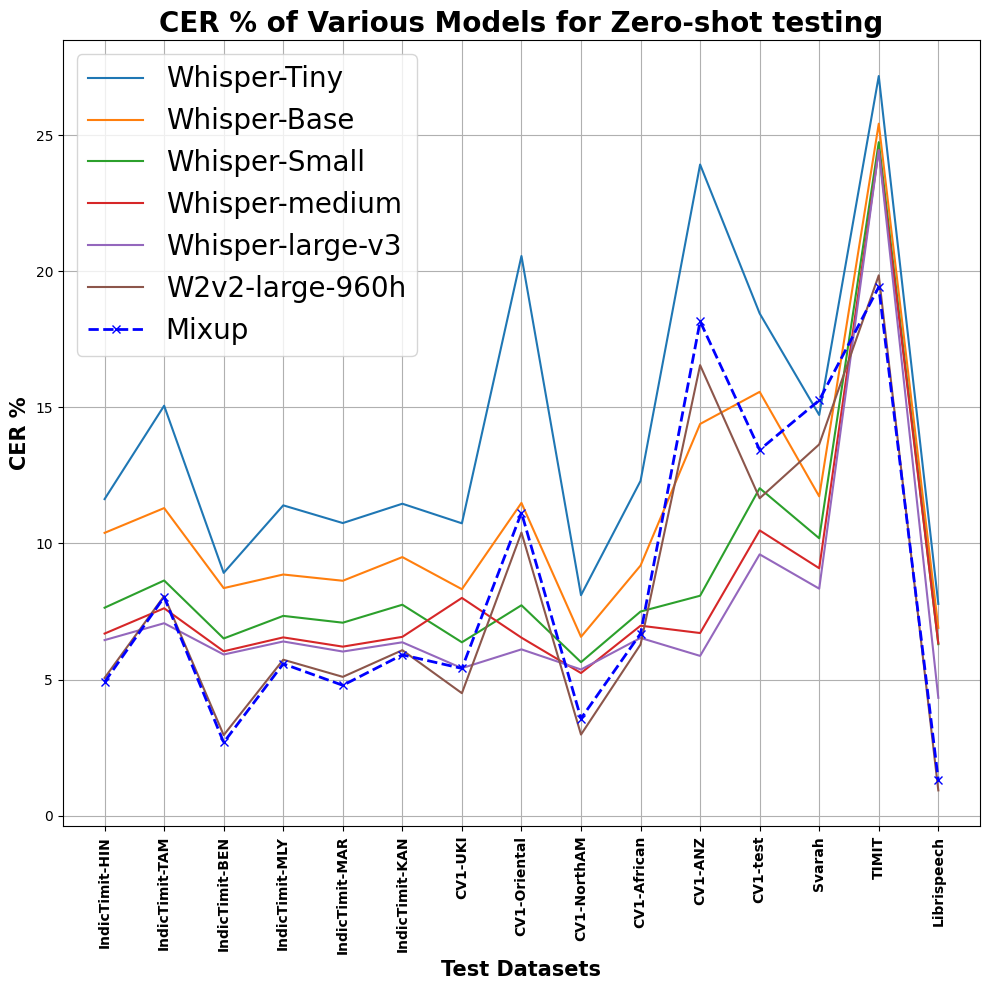

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
df2.plot(x='Test-Datasets', y=[ 'Whisper-Tiny', 'Whisper-Base','Whisper-Small','Whisper-medium','Whisper-large-v3','W2v2-large-960h'],ax=ax)
df2["Mixup"].plot(style='b--x',lw=2,ax=ax)
ax.set_ylabel('CER %',fontdict={'fontsize':15, 'weight':'bold'})
ax.set_xlabel('Test Datasets',fontdict={'fontsize':15, 'weight':'bold'})
title='CER % of Various Models for Zero-shot testing'
ax.set_title(title,fontdict={'fontsize':20, 'weight':'bold'})
plt.xticks(ticks=range(15),labels=list(df2['Test-Datasets']), fontsize=10, weight='bold',rotation=90)
plt.legend(fontsize = 20)
plt.grid()
plt.tight_layout()
savefile='plots_cer_results.png'
plt.savefig(savefile, bbox_inches='tight')
plt.show()

In [116]:
df_sorted = df2.sort_values(by='Mixup')
df_sorted=df_sorted.reset_index(drop=True)
df_sorted.to_csv('datasets/sorted_results.csv',index=False)
df_sorted

,Test-Datasets,Mixup,Whisper-Tiny,Whisper-Base,Whisper-Small,Whisper-medium,Whisper-large-v3,W2v2-large-960h
0,Librispeech,1.30,7.78,6.90,6.30,6.33,4.33,0.93
1,IndicTimit-BEN,2.69,8.92,8.36,6.51,6.04,5.92,2.96
2,CV1-NorthAM,3.57,8.10,6.57,5.64,5.24,5.37,2.98
3,IndicTimit-MAR,4.79,10.75,8.63,7.09,6.21,6.03,5.10
4,IndicTimit-HIN,4.91,11.63,10.39,7.64,6.69,6.45,5.06
5,CV1-UKI,5.41,10.74,8.32,6.37,8.00,5.42,4.50
6,IndicTimit-MLY,5.58,11.40,8.86,7.34,6.55,6.40,5.73
7,IndicTimit-KAN,5.91,11.46,9.50,7.75,6.57,6.37,6.08
8,CV1-African,6.69,12.30,9.19,7.50,6.98,6.53,6.29
9,IndicTimit-TAM,8.03,15.06,11.30,8.64,7.62,7.07,8.07


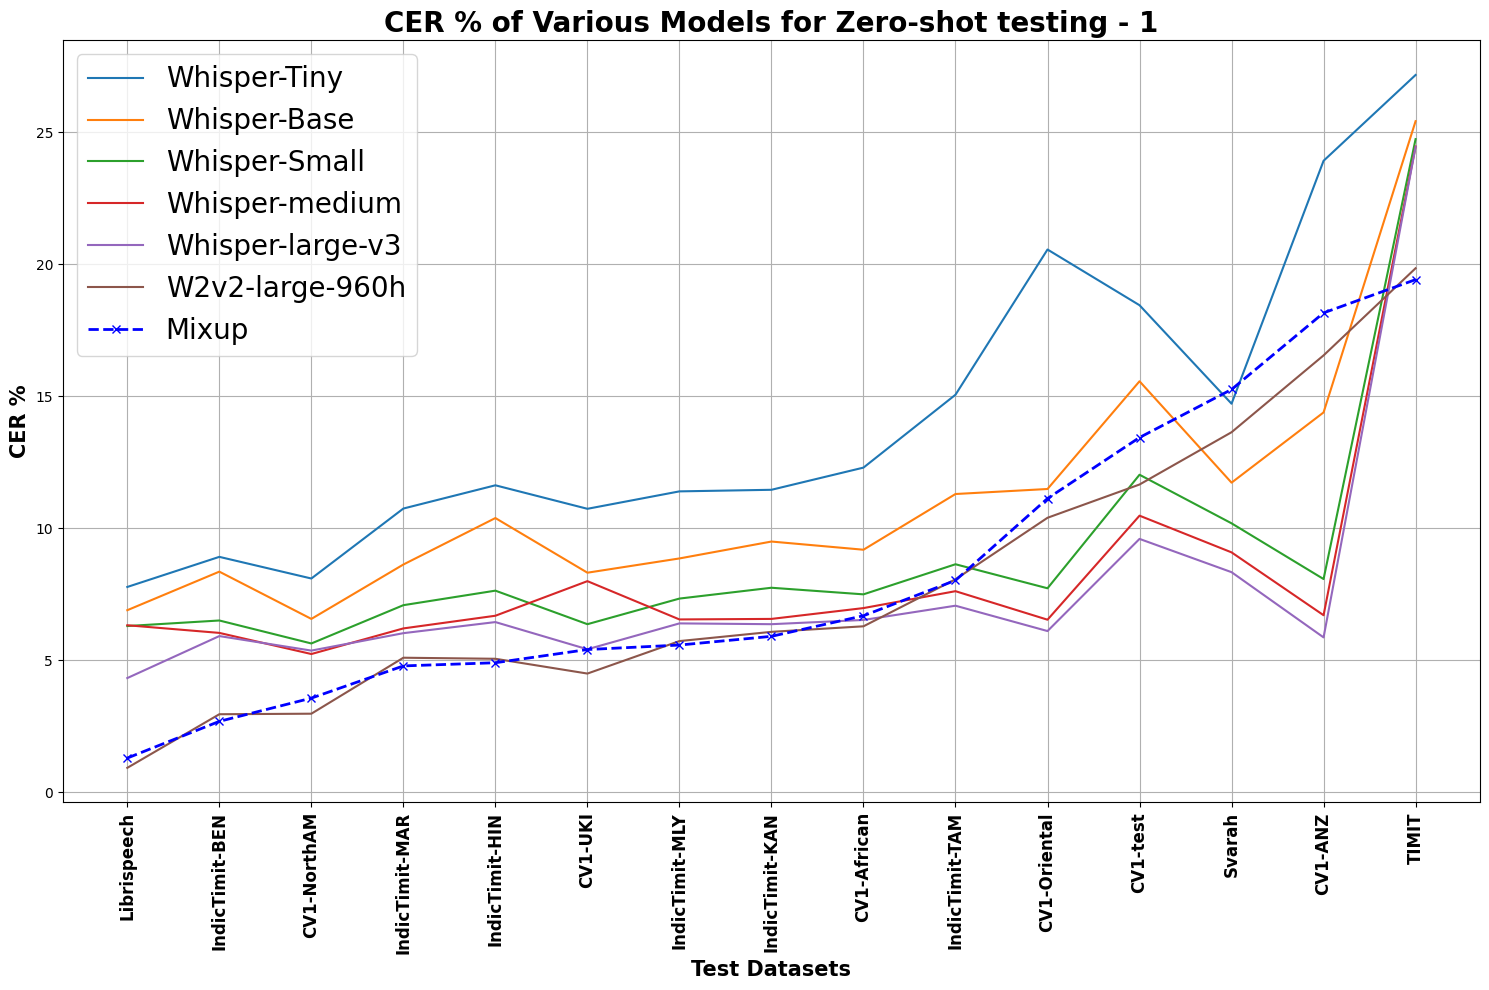

In [119]:
fig, ax = plt.subplots(figsize=(15, 10))
yset=[ 'Whisper-Tiny', 'Whisper-Base','Whisper-Small','Whisper-medium','Whisper-large-v3','W2v2-large-960h']
df_sorted.plot(x='Test-Datasets',y=yset,ax=ax)
df_sorted['Mixup'].plot(style='b--x',lw=2,ax=ax)
ax.set_ylabel('CER %',fontdict={'fontsize':15, 'weight':'bold'})
ax.set_xlabel('Test Datasets',fontdict={'fontsize':15, 'weight':'bold'})
title='CER % of Various Models for Zero-shot testing - 1'
ax.set_title(title,fontdict={'fontsize':20, 'weight':'bold'})
plt.xticks(ticks=range(15),labels=list(df_sorted['Test-Datasets']), fontsize=12, weight='bold',rotation=90)
plt.legend(fontsize = 20)
plt.grid()
plt.tight_layout()
savefile='plots1_cer_results.png'
plt.savefig(savefile, bbox_inches='tight')

plt.show()

In [107]:
print(list(df2['Test-Datasets']))

['IndicTimit-HIN', 'IndicTimit-TAM', 'IndicTimit-BEN', 'IndicTimit-MLY', 'IndicTimit-MAR', 'IndicTimit-KAN', 'CV1-UKI', 'CV1-Oriental', 'CV1-NorthAM', 'CV1-African', 'CV1-ANZ', 'CV1-test', 'Svarah', 'TIMIT', 'Librispeech']


In [114]:
list1=['IndicTimit-HIN', 'IndicTimit-TAM', 'IndicTimit-BEN', 'IndicTimit-MLY', 'IndicTimit-MAR', 'IndicTimit-KAN']
df3=df2[df2['Test-Datasets'].isin(list1)].sort_values(by='Mixup').reset_index(drop=True)
list2=['CV1-UKI', 'CV1-Oriental', 'CV1-NorthAM', 'CV1-African', 'CV1-ANZ', 'CV1-test']
df4=df2[df2['Test-Datasets'].isin(list2)].sort_values(by='Mixup').reset_index(drop=True)
list3=['Svarah', 'TIMIT']
df5=df2[df2['Test-Datasets'].isin(list3)]
list4=['Librispeech']
df6=df2[df2['Test-Datasets'].isin(list4)]


In [117]:
newdf=pd.concat([df6,df3,df4,df5],ignore_index=True)
newdf.to_csv('datasets/sorted_grouped_results.csv',index=False)
newdf

,Test-Datasets,Mixup,Whisper-Tiny,Whisper-Base,Whisper-Small,Whisper-medium,Whisper-large-v3,W2v2-large-960h
0,Librispeech,1.30,7.78,6.90,6.30,6.33,4.33,0.93
1,IndicTimit-BEN,2.69,8.92,8.36,6.51,6.04,5.92,2.96
2,IndicTimit-MAR,4.79,10.75,8.63,7.09,6.21,6.03,5.10
3,IndicTimit-HIN,4.91,11.63,10.39,7.64,6.69,6.45,5.06
4,IndicTimit-MLY,5.58,11.40,8.86,7.34,6.55,6.40,5.73
5,IndicTimit-KAN,5.91,11.46,9.50,7.75,6.57,6.37,6.08
6,IndicTimit-TAM,8.03,15.06,11.30,8.64,7.62,7.07,8.07
7,CV1-NorthAM,3.57,8.10,6.57,5.64,5.24,5.37,2.98
8,CV1-UKI,5.41,10.74,8.32,6.37,8.00,5.42,4.50
9,CV1-African,6.69,12.30,9.19,7.50,6.98,6.53,6.29


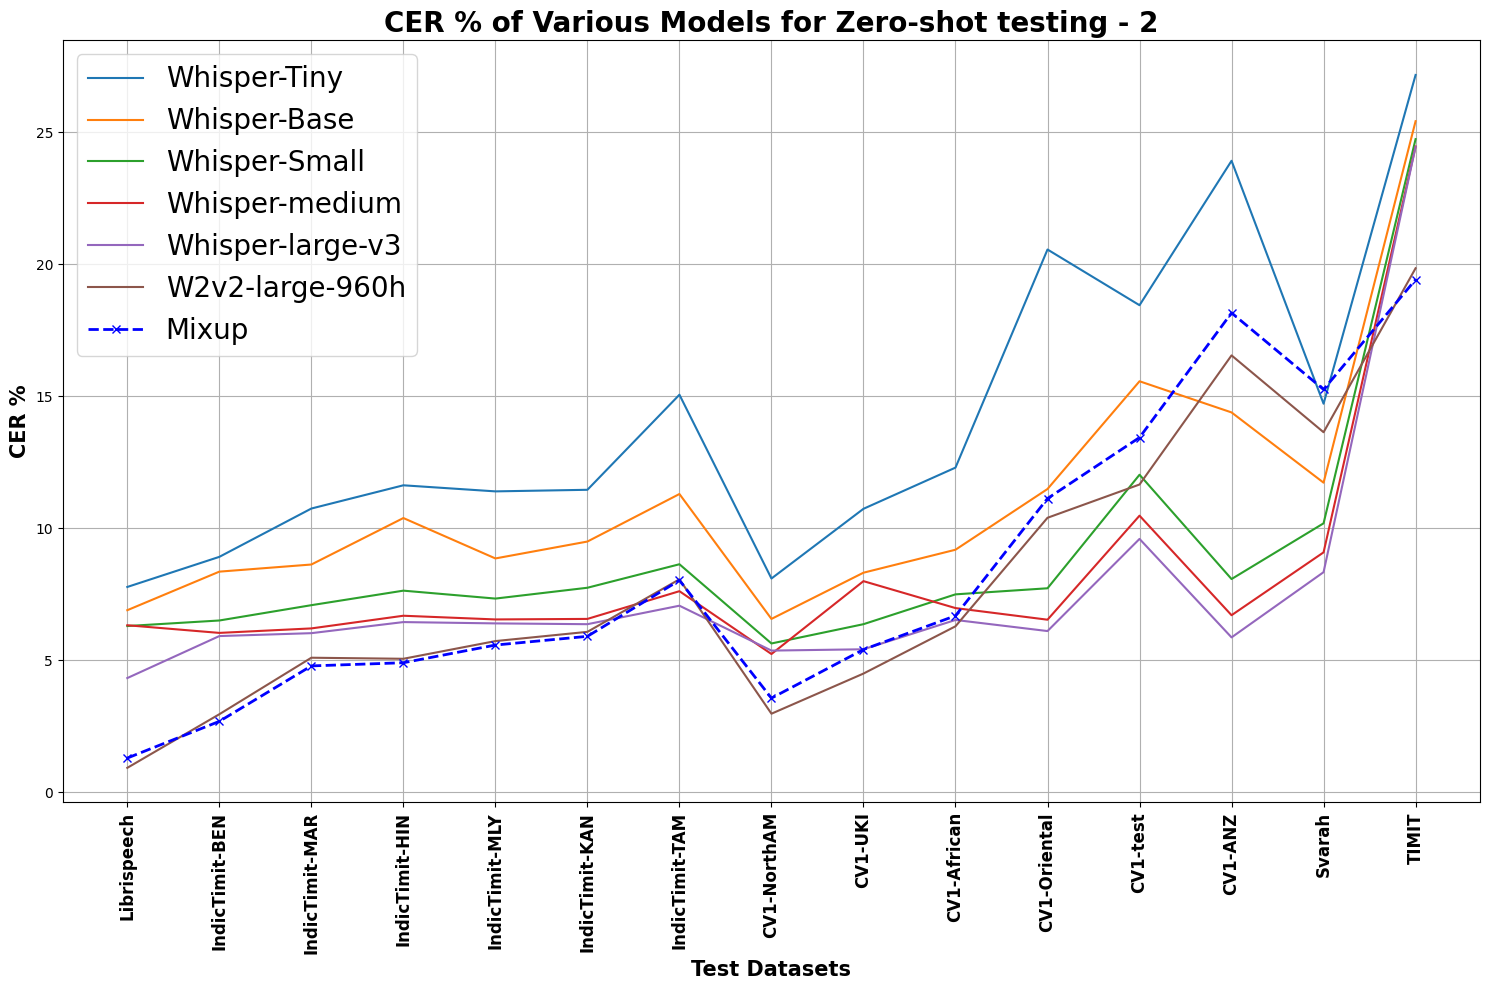

In [118]:
fig, ax = plt.subplots(figsize=(15, 10))
yset=[ 'Whisper-Tiny', 'Whisper-Base','Whisper-Small','Whisper-medium','Whisper-large-v3','W2v2-large-960h']
newdf.plot(x='Test-Datasets',y=yset,ax=ax)
newdf['Mixup'].plot(style='b--x',lw=2,ax=ax)
ax.set_ylabel('CER %',fontdict={'fontsize':15, 'weight':'bold'})
ax.set_xlabel('Test Datasets',fontdict={'fontsize':15, 'weight':'bold'})
title='CER % of Various Models for Zero-shot testing - 2'
ax.set_title(title,fontdict={'fontsize':20, 'weight':'bold'})
plt.xticks(ticks=range(15),labels=list(newdf['Test-Datasets']), fontsize=12, weight='bold',rotation=90)
plt.legend(fontsize = 20)
plt.grid()
plt.tight_layout()
savefile='plots2_cer_results.png'
plt.savefig(savefile, bbox_inches='tight')

plt.show()

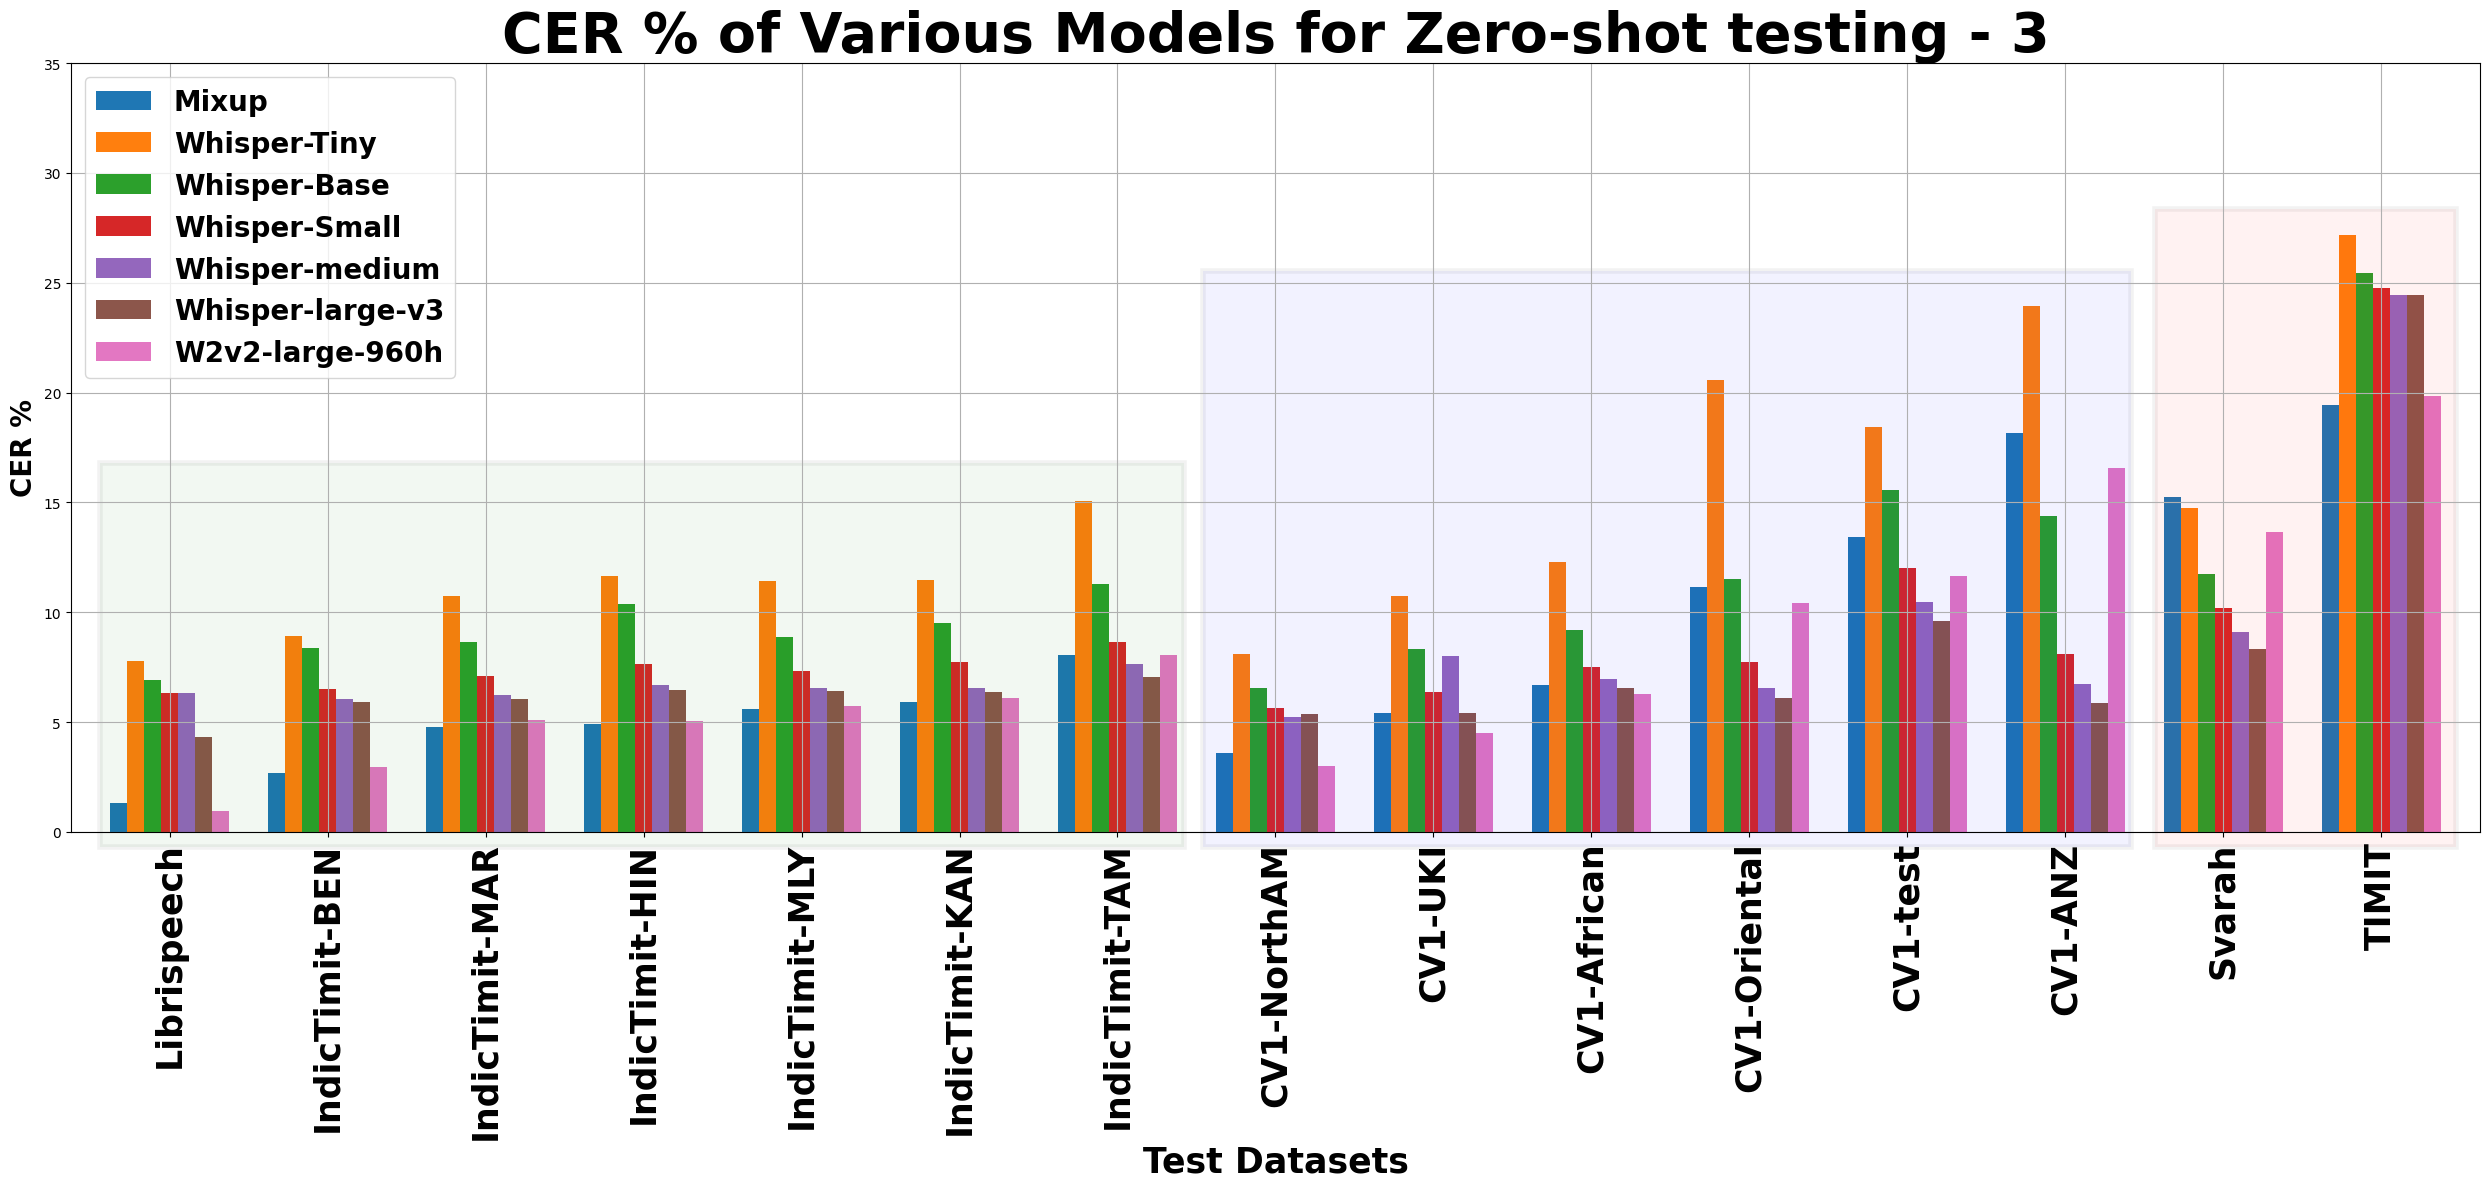

In [261]:
fig, ax = plt.subplots(figsize=(25, 12))
newdf.set_index('Test-Datasets').plot.bar(rot=90, ax=ax, width=0.75)
ax.set_ylabel('CER %',fontdict={'fontsize':20, 'weight':'bold'})
ax.set_xlabel('Test Datasets',fontdict={'fontsize':25, 'weight':'bold'})
ax.set_ylim(0,35,auto=True)

title='CER % of Various Models for Zero-shot testing - 3'
ax.set_title(title,fontdict={'fontsize':40, 'weight':'bold'})
plt.xticks(ticks=range(15),labels=list(newdf['Test-Datasets']), fontsize=25, weight='bold',rotation=90)

font_props = FontProperties(weight='bold', size=20)
plt.legend(prop=font_props)

rect = patches.Rectangle((.012, -.020), 0.45, 0.50, transform=ax.transAxes,edgecolor='black',
              facecolor='green',linewidth=4, alpha=0.05, clip_on=False, linestyle='solid')
ax.add_patch(rect)

rect = patches.Rectangle((.47, -.020), 0.385, 0.75, transform=ax.transAxes,edgecolor='black',
             facecolor='blue', linewidth=4, alpha=0.05, clip_on=False, linestyle='solid')
ax.add_patch(rect)

rect = patches.Rectangle((.865, -.020), 0.125, 0.83, transform=ax.transAxes,edgecolor='black',
            facecolor='red', linewidth=4, alpha=0.05, clip_on=False, linestyle='solid')
ax.add_patch(rect)


plt.grid()
plt.tight_layout()
# savefile='plots3_cer_results.png'
# plt.savefig(savefile, bbox_inches='tight')

plt.show()

In [206]:
# fig, ax = plt.subplots(figsize=(25, 10))
# bars=newdf.set_index('Test-Datasets').plot.bar(rot=90, ax=ax, width=0.75)
# bbox = ax.get_position(True)
# coords=bbox.bounds
# rect = patches.Rectangle((coords[0], coords[1]), coords[2], coords[3],
#                          linewidth=2, edgecolor='blue', facecolor='none')
# ax.add_patch(rect)

In [3]:
csvfn='datasets/zero_shot_results.csv'
df2=pd.read_csv(csvfn)
df2

,Test-Datasets,Mixup,Whisper-Tiny,Whisper-Base,Whisper-Small,Whisper-medium,Whisper-large-v3,W2v2-large-960h
0,IndicTimit-HIN,4.91,11.63,10.39,7.64,6.69,6.45,5.06
1,IndicTimit-TAM,8.03,15.06,11.30,8.64,7.62,7.07,8.07
2,IndicTimit-BEN,2.69,8.92,8.36,6.51,6.04,5.92,2.96
3,IndicTimit-MLY,5.58,11.40,8.86,7.34,6.55,6.40,5.73
4,IndicTimit-MAR,4.79,10.75,8.63,7.09,6.21,6.03,5.10
5,IndicTimit-KAN,5.91,11.46,9.50,7.75,6.57,6.37,6.08
6,CV1-UKI,5.41,10.74,8.32,6.37,8.00,5.42,4.50
7,CV1-Oriental,11.13,20.56,11.49,7.73,6.54,6.11,10.40
8,CV1-NorthAM,3.57,8.10,6.57,5.64,5.24,5.37,2.98
9,CV1-African,6.69,12.30,9.19,7.50,6.98,6.53,6.29


In [4]:
list1=['IndicTimit-HIN', 'IndicTimit-TAM', 'IndicTimit-BEN', 'IndicTimit-MLY', 'IndicTimit-MAR', 'IndicTimit-KAN', 'Svarah']
df3=df2[df2['Test-Datasets'].isin(list1)].sort_values(by='Mixup').reset_index(drop=True)
list2=['CV1-UKI', 'CV1-Oriental', 'CV1-NorthAM', 'CV1-African', 'CV1-ANZ', 'CV1-test']
df4=df2[df2['Test-Datasets'].isin(list2)].sort_values(by='Mixup').reset_index(drop=True)
list3=['Librispeech', 'TIMIT']
df5=df2[df2['Test-Datasets'].isin(list3)].sort_values(by='Mixup').reset_index(drop=True)

In [12]:
newdf1=pd.concat([df3,df4,df5],ignore_index=True)
cols = newdf1.columns.tolist()
print(cols)
lcol=cols[-1]
newcols=cols[:2]+[lcol]+cols[2:-1]
print(newcols)
newdf1=newdf1[newcols]
newdf1.to_csv('datasets/sorted_grouped_results1.csv',index=False)
newdf1

['Test-Datasets', 'Mixup', 'Whisper-Tiny', 'Whisper-Base', 'Whisper-Small', 'Whisper-medium', 'Whisper-large-v3', 'W2v2-large-960h']
['Test-Datasets', 'Mixup', 'W2v2-large-960h', 'Whisper-Tiny', 'Whisper-Base', 'Whisper-Small', 'Whisper-medium', 'Whisper-large-v3']


,Test-Datasets,Mixup,W2v2-large-960h,Whisper-Tiny,Whisper-Base,Whisper-Small,Whisper-medium,Whisper-large-v3
0,IndicTimit-BEN,2.69,2.96,8.92,8.36,6.51,6.04,5.92
1,IndicTimit-MAR,4.79,5.10,10.75,8.63,7.09,6.21,6.03
2,IndicTimit-HIN,4.91,5.06,11.63,10.39,7.64,6.69,6.45
3,IndicTimit-MLY,5.58,5.73,11.40,8.86,7.34,6.55,6.40
4,IndicTimit-KAN,5.91,6.08,11.46,9.50,7.75,6.57,6.37
5,IndicTimit-TAM,8.03,8.07,15.06,11.30,8.64,7.62,7.07
6,Svarah,15.26,13.64,14.72,11.73,10.19,9.09,8.34
7,CV1-NorthAM,3.57,2.98,8.10,6.57,5.64,5.24,5.37
8,CV1-UKI,5.41,4.50,10.74,8.32,6.37,8.00,5.42
9,CV1-African,6.69,6.29,12.30,9.19,7.50,6.98,6.53


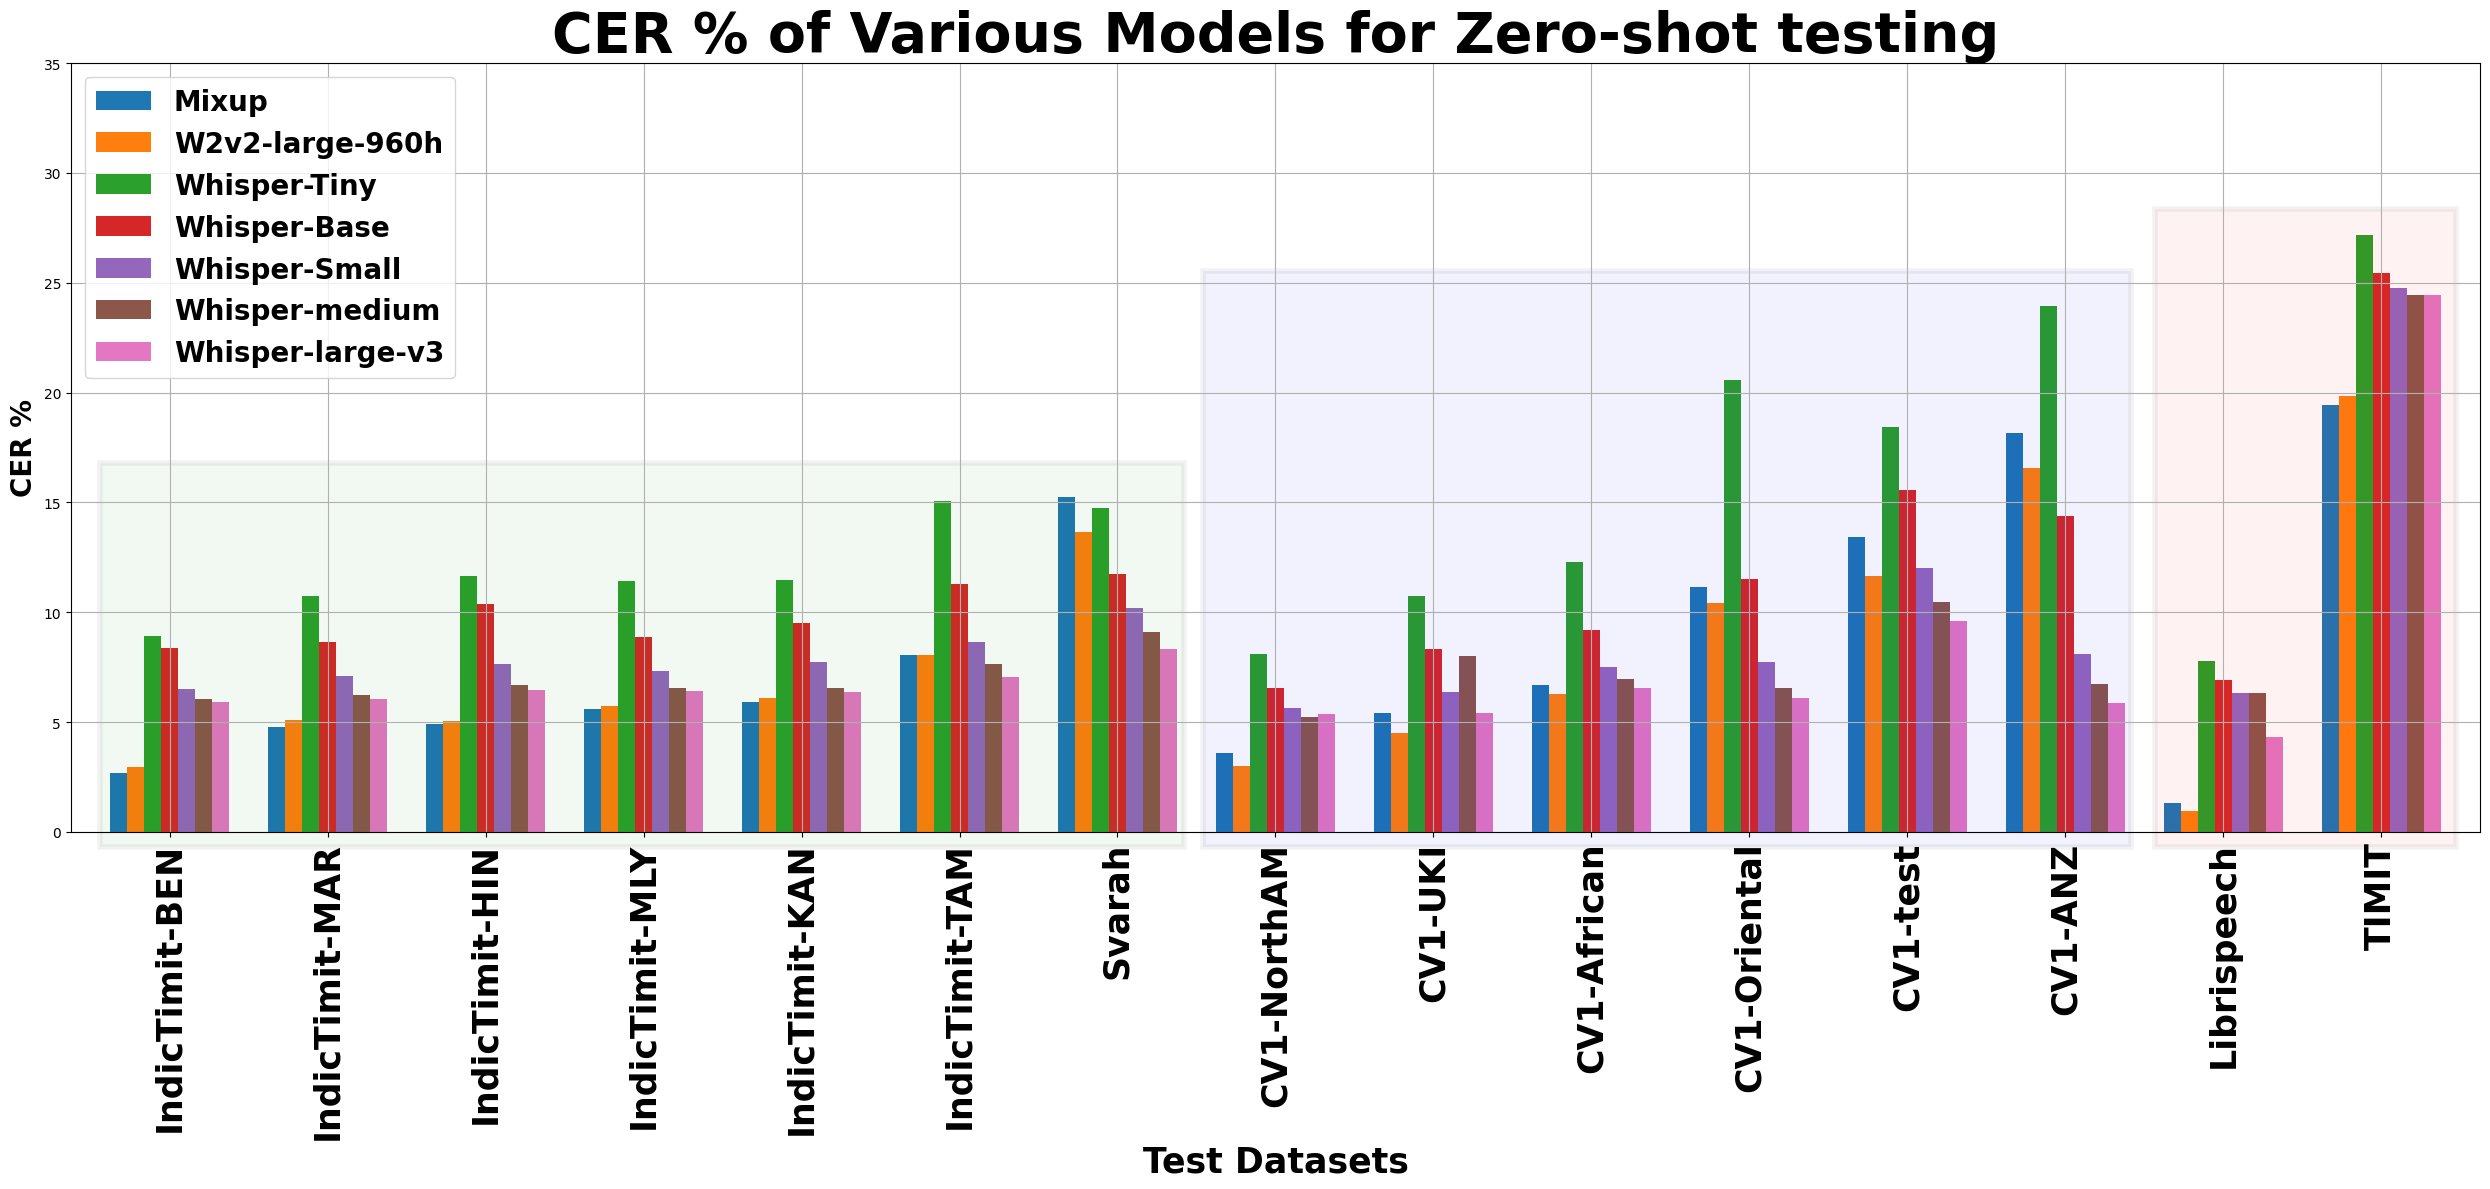

In [14]:
fig, ax = plt.subplots(figsize=(25, 12))
newdf1.set_index('Test-Datasets').plot.bar(rot=90, ax=ax, width=0.75)
ax.set_ylabel('CER %',fontdict={'fontsize':20, 'weight':'bold'})
ax.set_xlabel('Test Datasets',fontdict={'fontsize':25, 'weight':'bold'})
ax.set_ylim(0,35,auto=True)

title='CER % of Various Models for Zero-shot testing'
ax.set_title(title,fontdict={'fontsize':40, 'weight':'bold'})
plt.xticks(ticks=range(15),labels=list(newdf1['Test-Datasets']), fontsize=25, weight='bold',rotation=90)

font_props = FontProperties(weight='bold', size=20)
plt.legend(prop=font_props)

rect = patches.Rectangle((.012, -.020), 0.45, 0.50, transform=ax.transAxes,edgecolor='black',
              facecolor='green',linewidth=4, alpha=0.05, clip_on=False, linestyle='solid')
ax.add_patch(rect)

rect = patches.Rectangle((.47, -.020), 0.385, 0.75, transform=ax.transAxes,edgecolor='black',
             facecolor='blue', linewidth=4, alpha=0.05, clip_on=False, linestyle='solid')
ax.add_patch(rect)

rect = patches.Rectangle((.865, -.020), 0.125, 0.83, transform=ax.transAxes,edgecolor='black',
            facecolor='red', linewidth=4, alpha=0.05, clip_on=False, linestyle='solid')
ax.add_patch(rect)


plt.grid()
plt.tight_layout()
savefile='plots3_cer_results.png'
plt.savefig(savefile, bbox_inches='tight')

plt.show()